In [3]:
import sys
sys.path.append('../') 

import MetaTrader5 as mt5
import pytz

from datetime import datetime
from terminal.Extensions.Mt5Helper import Mt5Helper

In [4]:
mt5.initialize()

True

In [8]:
from_date = datetime(2024, 5, 28, tzinfo=pytz.utc)
to_date = datetime(2024, 5, 29, tzinfo=pytz.utc)

In [9]:
data = mt5.copy_ticks_range('WINM24', from_date, to_date, mt5.COPY_TICKS_TRADE)

<Axes: xlabel='time_msc'>

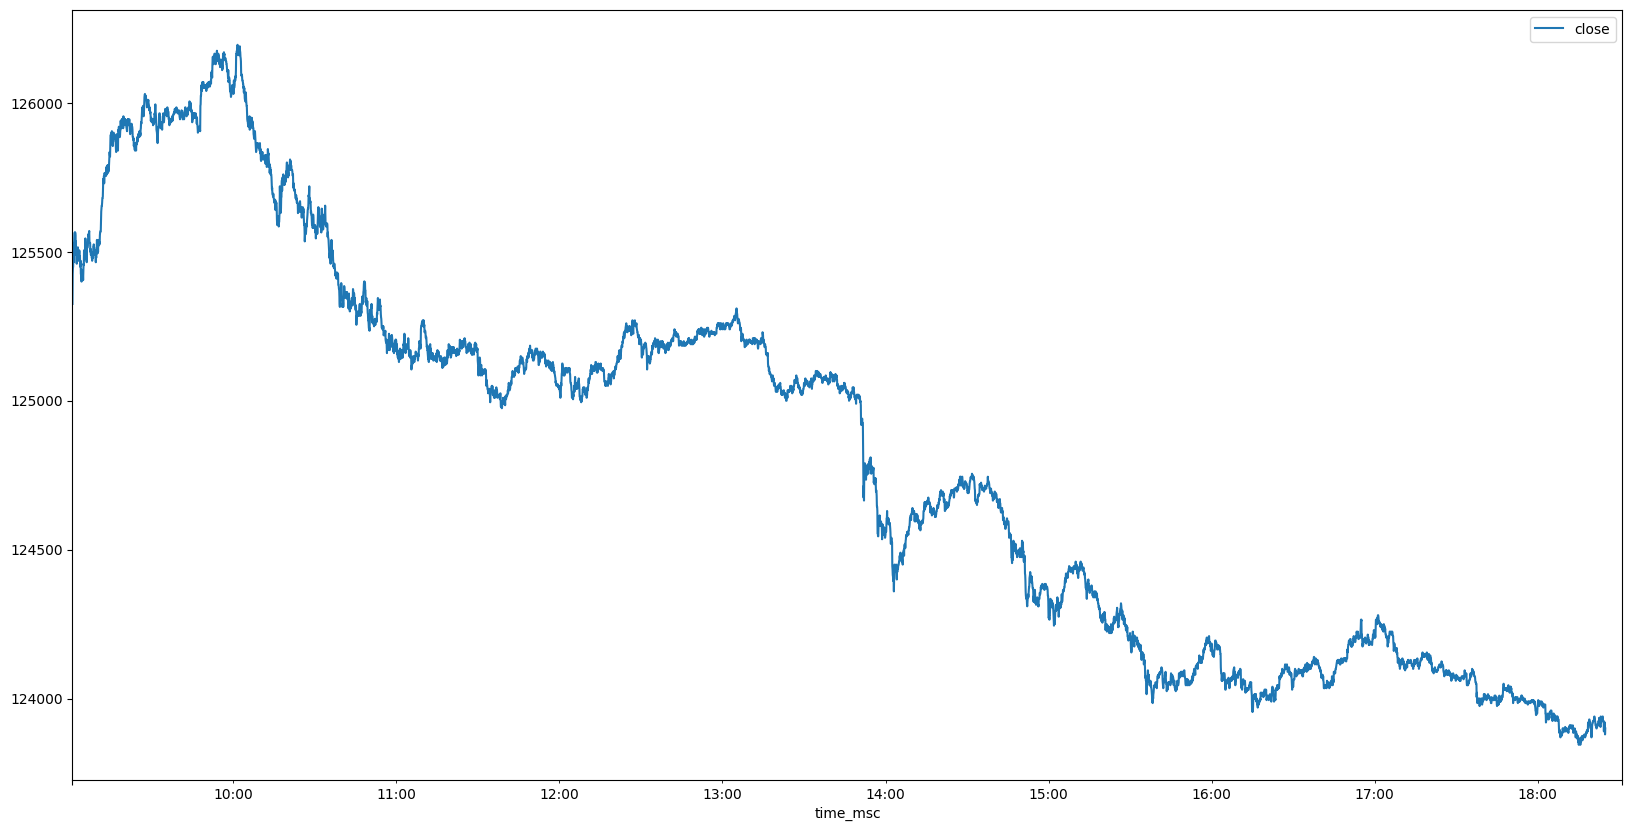

In [29]:
rates = Mt5Helper.OHLC(data, '5s')
rates['mean1'] = rates['close'].rolling(12).mean()
rates['mean2'] = rates['close'].rolling(18).mean()
rates[['close']].plot(figsize=(20,10))

<Axes: xlabel='time_msc'>

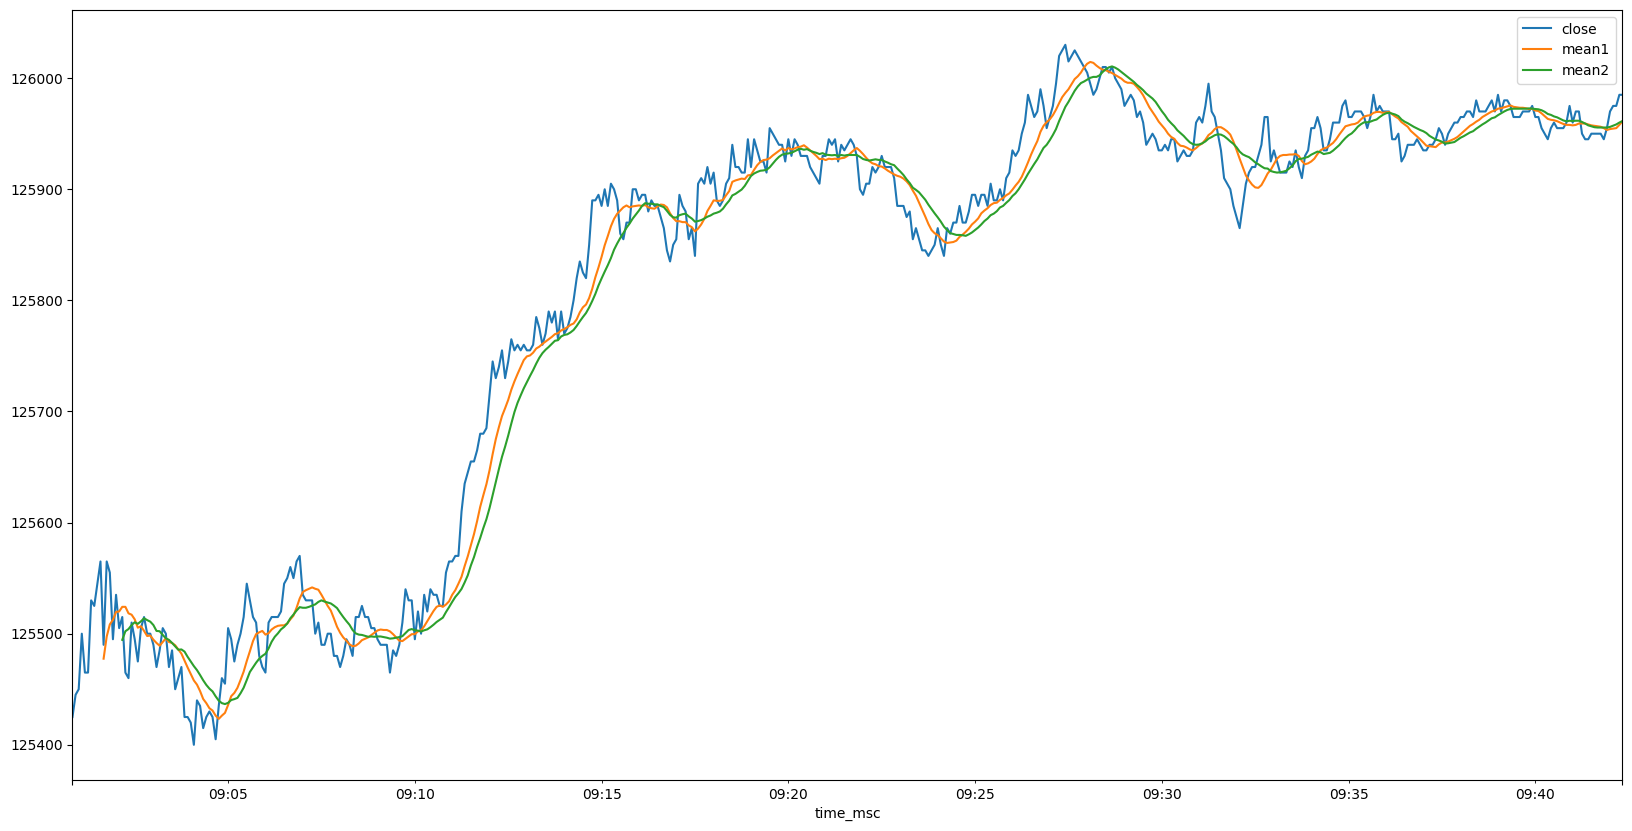

In [28]:
rates.iloc[1:500][['close','mean1', 'mean2']].plot(figsize=(20,10))